# Midterm - solution

First of all, let us import the libraries we are going to work with

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy.utilities.lambdify import lambdify

## Question 3 - taken from Jordi Bardales' solution

In [ ]:
P = np.array([[-2, 1], [0, -4.0], [3, 2], [5, 0]])

# Bezier curve
def cubic_bezier(t, p):
    return (1 - t)**3*p[0] + 3*(1 - t)**2*t*p[1] + 3*(1 - t)*t**2*p[2] + t**3*p[3]

# B_Spline
def N(i, k, t, t_val, T):
    """
    Parameters
    ----------
    k: b-spline order, degre of polynomial is k - 1
    T: vector node
    """
    if k == 1:
        return 1 if T[i] <= t_val < T[i+1] else 0
    else:
        return (t - T[i])/(T[i+k-1] - T[i])*N(i, k-1, t, t_val, T) + (T[i+k] - t)/(T[i+k] - T[i+1])*N(i+1, k-1, t, t_val, T)

def uniform_b_spline(t, t_val, k, T, points):
    sk = 0
    n = len(points)
    for i in range(n):
        print(f"N_{i},{k - 1} =", sp.expand(N(i, k, t, t_val, T)))
        sk += points[i]*N(i, k, t, t_val, T)
    return sk
    
sp.init_printing(use_unicode=True)
t = sp.symbols('t')

### (a) Parametric description $P(t)$ of the cubic Bezier 

In [ ]:
p_t = cubic_bezier(t, P)
print("x(t) =")
sp.expand(p_t[0])

x(t) =


In [ ]:
print("y(t) =")
sp.expand(p_t[1])

y(t) =


### (b) Print the Bezier curve above with its control points $P_0, P_1, P_2, P_4$

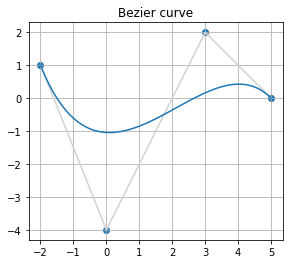

In [ ]:
t_interval = np.linspace(0, 1, 100)
x_interval = [-2.0*t**3 + 3.0*t**2 + 6.0*t - 2.0 for t in t_interval]
y_interval = [-19.0*t**3 + 33.0*t**2 - 15.0*t + 1.0 for t in t_interval]

plt.title("Bezier curve")
plt.plot(P[:,0], P[:,1], c='lightgray')
plt.plot(x_interval, y_interval)
plt.scatter(P[:,0], P[:,1])
plt.axis("scaled")
plt.grid(True)
plt.show()

### (c) Parametric description $P(t)$ of the uniform quadratic B-spline


In [ ]:
k = 3          # degree 2, order 3
n = len(P)     # 4 points
T = [i for i in range(n + k)]

print("Two intervals\n-------------")
for t_val in range(k - 1, n):
    print(f"t in [{t_val}, {t_val + 1}]")

    b_spline = uniform_b_spline(t, t_val, k, T, P)
    x = sp.expand(b_spline[0])
    y = sp.expand(b_spline[1])

    print("Parametric equation")
    print("x(t) =", x)
    print("y(t) =", y)
    print()

Two intervals
-------------
t in [2, 3]
N_0,2 = t**2/2 - 3*t + 9/2
N_1,2 = -t**2 + 5*t - 11/2
N_2,2 = t**2/2 - 2*t + 2
N_3,2 = 0
Parametric equation
x(t) = 0.5*t**2 - 3.0
y(t) = 5.5*t**2 - 27.0*t + 30.5

t in [3, 4]
N_0,2 = 0
N_1,2 = t**2/2 - 4*t + 8
N_2,2 = -t**2 + 7*t - 23/2
N_3,2 = t**2/2 - 3*t + 9/2
Parametric equation
x(t) = -0.5*t**2 + 6.0*t - 12.0
y(t) = -4.0*t**2 + 30.0*t - 55.0



### (d) Print B-Spline above with its control points $P_0, P_1, P_2, P_3$ 

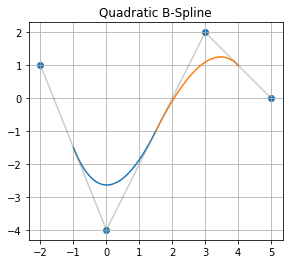

In [ ]:
t1 = np.linspace(2, 3, 100)
x1 = [0.5*t**2 - 3.0 for t in t1]
y1 = [5.5*t**2 - 27.0*t + 30.5 for t in t1]

t2 = np.linspace(3, 4, 100)
x2 = [-0.5*t**2 + 6.0*t - 12.0 for t in t2]
y2 = [-4.0*t**2 + 30.0*t - 55.0 for t in t2]

plt.title('Quadratic B-Spline')
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.scatter(P[:, 0], P[:, 1])
plt.plot(P[:, 0], P[:, 1], '-', c='gray', alpha=0.4)
plt.axis('scaled')
plt.grid(True)
plt.show()

## Question 4 - taken from Jordi Bardales' solution

### (a) Parametric description $P(t)$ of the uniform cubic B-spline

In [ ]:
P4 = np.array([[-1, 0], [1, 4.0], [3, -2], [4, 3], [6, 1]])

k = 4               # degree 3, order 4
n = len(P4)         # 5 points
T = [i for i in range(n + k)]

print("Two intervals\n------------")
for t_val in range(k - 1, n):
    print(f"t in [{t_val}, {t_val + 1}]")

    b_spline = uniform_b_spline(t, t_val, k, T, P4)
    x = sp.expand(b_spline[0])
    y = sp.expand(b_spline[1])

    print("x(t) =", x)
    print("y(t) =", y)
    print()

Two intervals
------------
t in [3, 4]
N_0,3 = -t**3/6 + 2*t**2 - 8*t + 32/3
N_1,3 = t**3/2 - 11*t**2/2 + 39*t/2 - 131/6
N_2,3 = -t**3/2 + 5*t**2 - 16*t + 50/3
N_3,3 = t**3/6 - 3*t**2/2 + 9*t/2 - 9/2
N_4,3 = 0
x(t) = -0.166666666666667*t**3 + 1.5*t**2 - 2.5*t - 0.500000000000002
y(t) = 3.5*t**3 - 36.5*t**2 + 123.5*t - 134.166666666667

t in [4, 5]
N_0,3 = 0
N_1,3 = -t**3/6 + 5*t**2/2 - 25*t/2 + 125/6
N_2,3 = t**3/2 - 7*t**2 + 32*t - 142/3
N_3,3 = -t**3/2 + 13*t**2/2 - 55*t/2 + 229/6
N_4,3 = t**3/6 - 2*t**2 + 8*t - 32/3
x(t) = 0.333333333333333*t**3 - 4.5*t**2 + 21.5*t - 32.5
y(t) = -3.0*t**3 + 41.5*t**2 - 188.5*t + 281.833333333333



### (b) Print B-Spline above with its control points $P_0, P_1, P_2, P_3, P_4$ 

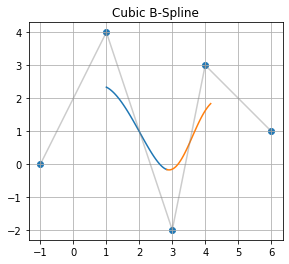

In [ ]:
# interval 1
t4_1 = np.linspace(3, 4, 100)
x4_1 = [-0.166666666666667*t**3 + 1.5*t**2 - 2.5*t - 0.5 for t in t4_1]
y4_1 = [3.5*t**3 - 36.5*t**2 + 123.5*t - 134.166666666667 for t in t4_1]

# interval 2
t4_2 = np.linspace(4, 5, 100)
x4_2 = [0.333333333333333*t**3 - 4.5*t**2 + 21.5*t - 32.5 for t in t4_2]
y4_2 = [-3.0*t**3 + 41.5*t**2 - 188.5*t + 281.833333333333 for t in t4_2]

plt.title('Cubic B-Spline')
plt.plot(x4_1, y4_1)
plt.plot(x4_2, y4_2)
plt.scatter(P4[:, 0], P4[:, 1])
plt.plot(P4[:, 0], P4[:, 1], '-', c='gray', alpha=0.4)
plt.axis('scaled')
plt.grid(True)
plt.show()

### (c) Verify by finding the derivatives that ....

In [ ]:
# First derivative
print("First derivative\n")
print("t in [3, 4]")

# The method sp.diff converts a sympy object to python function 
dx4_1 = sp.diff(-0.166666666666667*t**3 + 1.5*t**2 - 2.5*t - 0.5)
dy4_1 = sp.diff(3.5*t**3 - 36.5*t**2 + 123.5*t - 134.166666666667)

print("x1'(t) =", dx4_1)
print("y1'(t) =", dy4_1)

print("x1'(4) =", lambdify(t, dx4_1)(4))
print("y1'(4) =", lambdify(t, dy4_1)(4))

print("\nt in [4, 5]")
dx4_2 = sp.diff(0.333333333333333*t**3 - 4.5*t**2 + 21.5*t - 32.5)
dy4_2 = sp.diff(-3.0*t**3 + 41.5*t**2 - 188.5*t + 281.833333333333)

print("x2'(t) =", dx4_2)
print("y2'(t) =", dy4_2)

print("x2'(4) =", lambdify(t, dx4_2)(4))
print("y2'(4) =", lambdify(t, dy4_2)(4))
print("\nThe first derivates match at t=4")

First derivative

t in [3, 4]
x1'(t) = -0.500000000000001*t**2 + 3.0*t - 2.5
y1'(t) = 10.5*t**2 - 73.0*t + 123.5
x1'(4) = 1.499999999999984
y1'(4) = -0.5

t in [4, 5]
x2'(t) = 0.999999999999999*t**2 - 9.0*t + 21.5
y2'(t) = -9.0*t**2 + 83.0*t - 188.5
x2'(4) = 1.4999999999999858
y2'(4) = -0.5

The first derivates match at t=4


In [ ]:
# Second derivative
print("Second derivative\n")
print("t in [3, 4]")

d2x4_1 = sp.diff(dx4_1)
d2y4_1 = sp.diff(dy4_1)

print("x1\"(t) =", d2x4_1)
print("y1\"(t) =", d2y4_1)

print("x1\"(4) =", lambdify(t, d2x4_1)(4))
print("y1\"(4) =", lambdify(t, d2y4_1)(4))

print("\nt in [4, 5]")

d2x4_2 = sp.diff(dx4_2)
d2y4_2 = sp.diff(dy4_2)

print("x2\"(t) =", d2x4_2)
print("y2\"(t) =", d2y4_2)

print("x2\"(4) =", lambdify(t, d2x4_2)(4))
print("y2\"(4) =", lambdify(t, d2y4_2)(4))

print("\nThe second derivates match at t=4")

Second derivative

t in [3, 4]
x1"(t) = -1.0*t + 3.0
y1"(t) = 21.0*t - 73.0
x1"(4) = -1.0
y1"(4) = 11.0

t in [4, 5]
x2"(t) = 2.0*t - 9.0
y2"(t) = -18.0*t + 83.0
x2"(4) = -1.0
y2"(4) = 11.0

The second derivates match at t=4
